In [4]:
#installing the packages
!pip install tensorflow
!pip install keras
!pip install scikeras


In [5]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

In [6]:
#reading the dataset
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

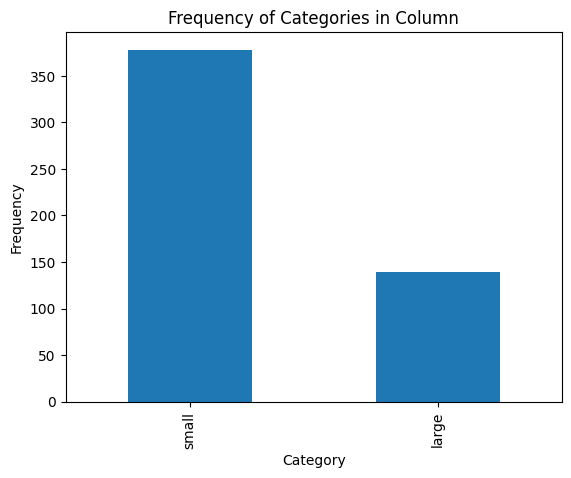

In [8]:
#plotting a bar plot for size category
df['size_category'].value_counts().plot(kind= 'bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in Column')
plt.show()

In [9]:
#ordering the month column
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories= months, ordered = True)

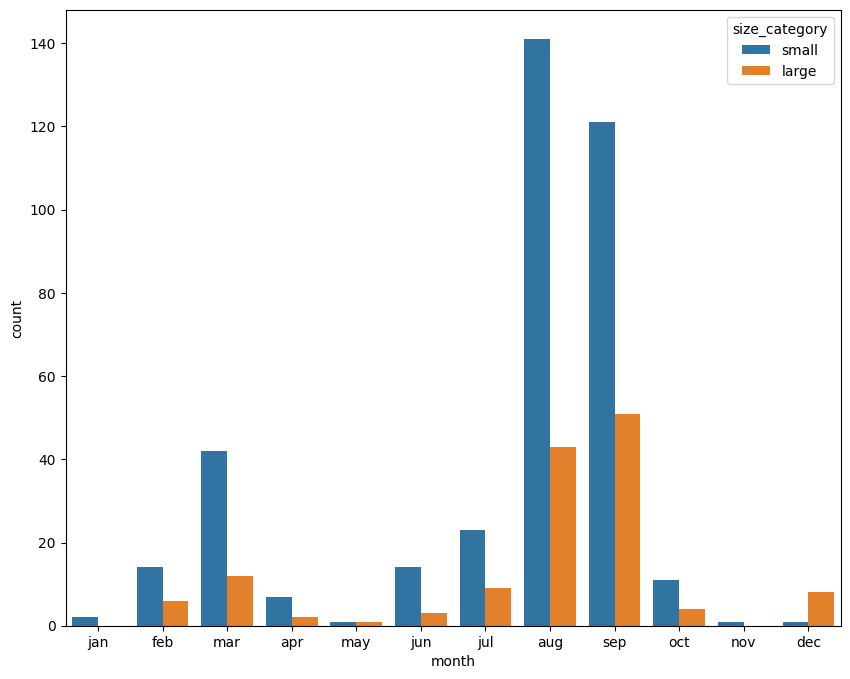

In [10]:
#plotting the month with size category as hue
plt.figure(figsize= (10,8))
sns.countplot(x = df['month'], hue = df['size_category'])
plt.show()

In [11]:
#ordering the days
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['day'] = pd.Categorical(df['day'], categories = days, ordered = True)

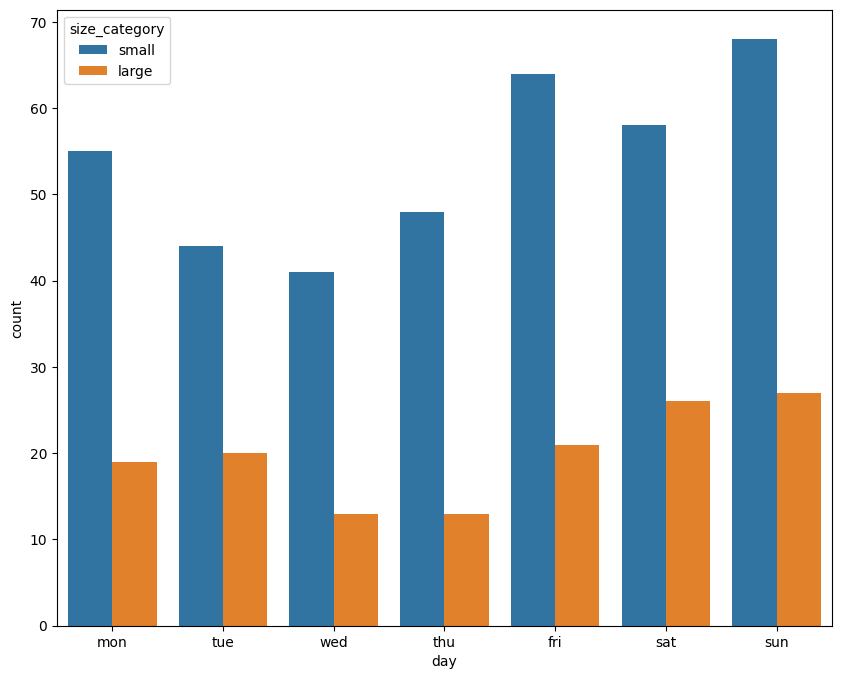

In [12]:
#plotting the day with size category as hue
plt.figure(figsize= (10,8))
sns.countplot(x = df['day'], hue = df['size_category'])
plt.show()

In [13]:
#storing the numerical column that have more than 2 unique values
numeric_col = df.select_dtypes(include = ['int64', 'float64']).columns
numeric_col = [col for col in numeric_col if df[col].nunique() > 2]
numeric_col

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

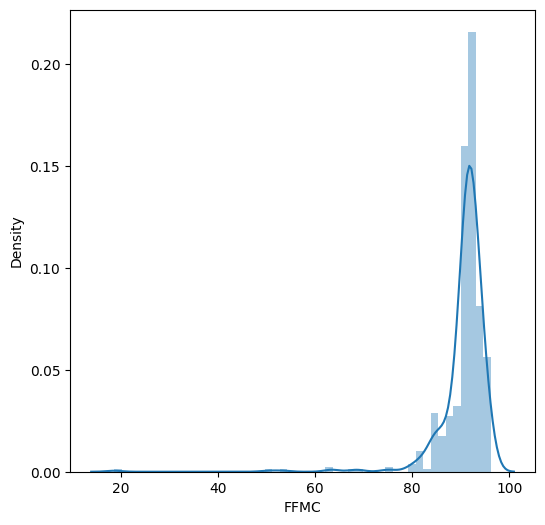

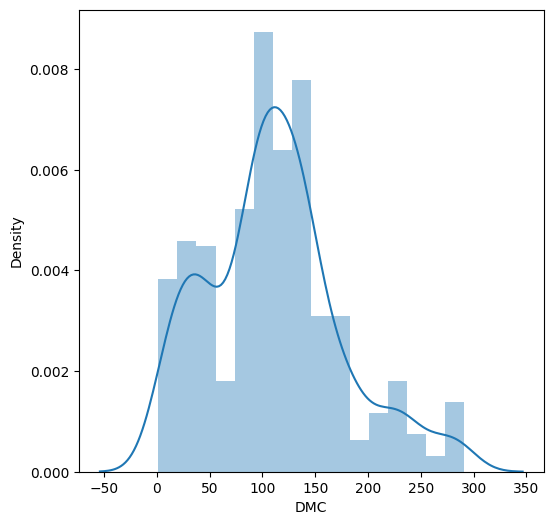

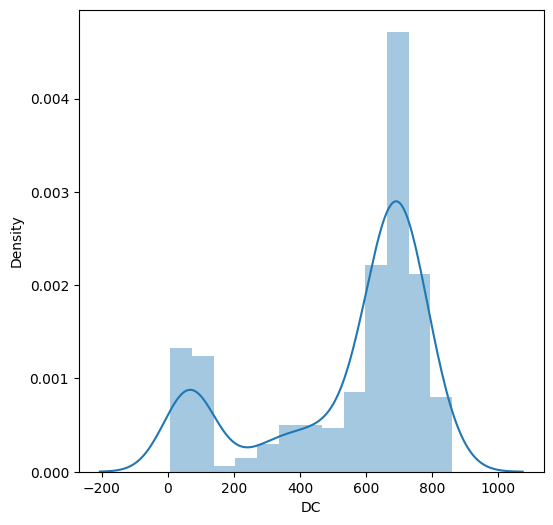

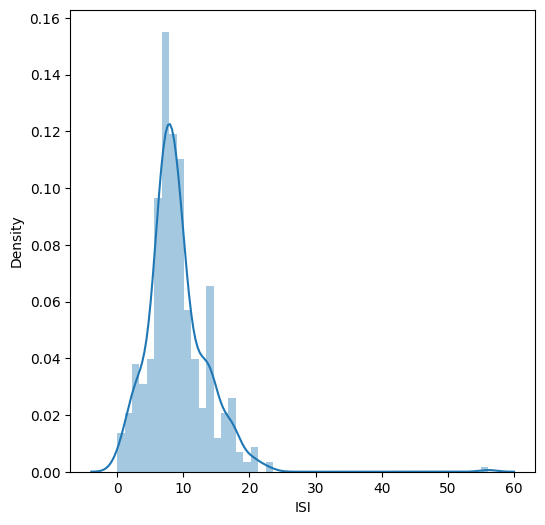

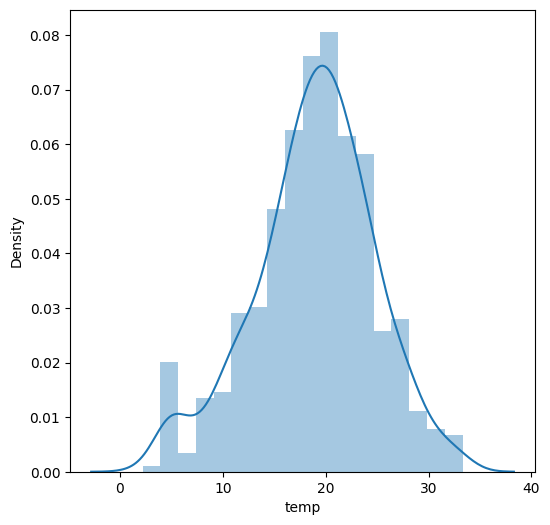

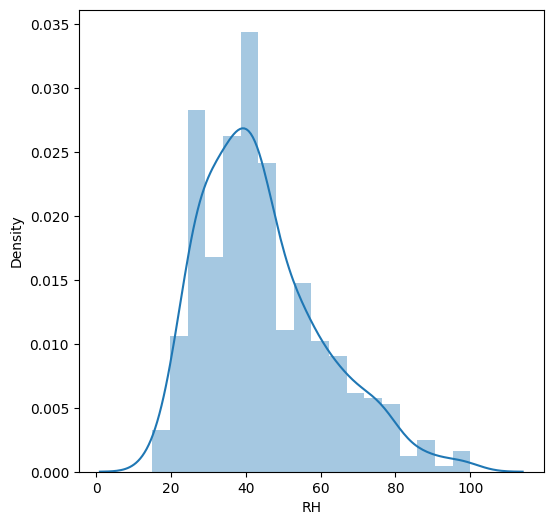

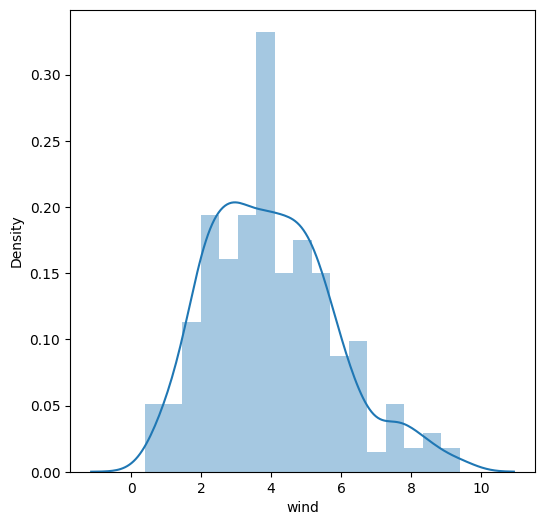

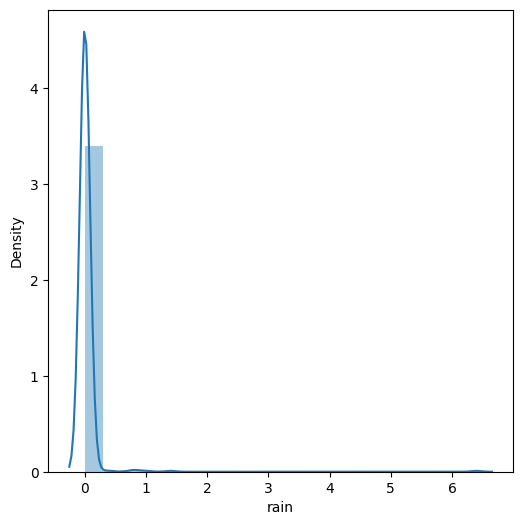

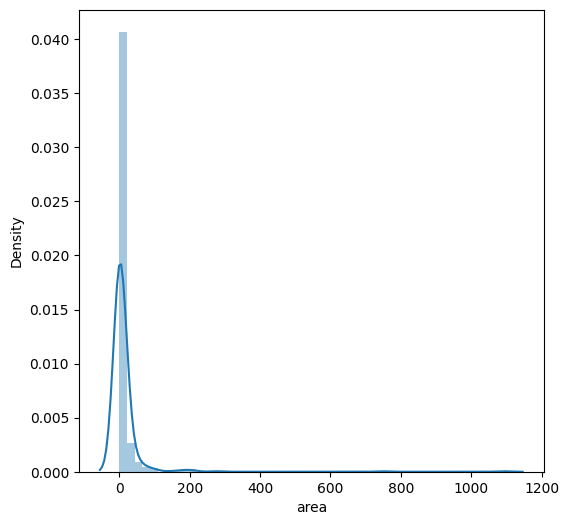

In [14]:
#plotting distribution plot for the numerical columns
for col in numeric_col:
  plt.figure(figsize= (6,6))
  sns.distplot(df[col])
  plt.show()

In [15]:
#Dropping the month and day column from the dataset and creating a copy.
df2 = df.drop(['month', 'day'], axis=1).copy()
df2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [16]:
#converting the size_category categorical variable into discreete
le = LabelEncoder()
df2['size_category'] = le.fit_transform(df2['size_category'])
df2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#Splitting the data into Independent and dependent variables
x = df2.drop(['size_category'], axis=1)
y = df2[['size_category']]

In [18]:
#Splitting the data into training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 31)

In [19]:
sm = SMOTE(random_state = 14)
xtrain_sm, ytrain_sm = sm.fit_resample(xtrain, np.array(ytrain).ravel())
xtrain_sm, ytrain_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.100000  157.300000  666.700000  13.500000  28.700000  28  2.700000   
 1    92.400000  105.800000  758.100000   9.900000  24.900000  27  2.200000   
 2    91.100000   91.300000  738.100000   7.200000  19.100000  46  2.200000   
 3    92.400000  124.100000  680.700000   8.500000  17.200000  58  1.300000   
 4    89.700000   90.000000  704.400000   4.800000  17.800000  67  2.200000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  92.329623  103.192426  469.306225  10.007574  23.215363  39  3.088868   
 534  89.899631  282.307197  838.312919   6.770849  15.733578  63  3.885609   
 535  91.700981  102.452066  755.303923  10.451857  23.254800  37  3.124457   
 536  92.339909  142.455373  625.281832   7.594841  20.901117  39  3.402690   
 537  93.406089  145.496617  721.697563  10.823410  20.880920  43  4.289580   
 
      rain       area  dayfri  ...  monthdec  mont

In [20]:
xtrain = xtrain_sm.copy()
ytrain = ytrain_sm.copy()

In [21]:
scale = MinMaxScaler()
Xtrain = scale.fit_transform(xtrain)
Xtrain

array([[0.96      , 0.53824948, 0.77223071, ..., 0.        , 0.        ,
        0.        ],
       [0.95096774, 0.36078567, 0.87959591, ..., 0.        , 0.        ,
        1.        ],
       [0.93419355, 0.31082012, 0.85610243, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.94194814, 0.34924902, 0.87631143, ..., 0.        , 0.        ,
        1.        ],
       [0.95019237, 0.48709639, 0.72357786, ..., 0.        , 0.        ,
        0.        ],
       [0.96394954, 0.49757621, 0.83683492, ..., 0.        , 0.        ,
        1.        ]])

In [22]:
Xtest = scale.fit_transform(xtest)
Xtest

array([[0.9235474 , 0.79477352, 0.83455275, ..., 0.        , 0.        ,
        0.        ],
       [0.72477064, 0.0728223 , 0.06702856, ..., 0.        , 0.        ,
        0.        ],
       [0.85321101, 0.48571429, 0.70037763, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.87767584, 0.27456446, 0.55805995, ..., 0.        , 0.        ,
        0.        ],
       [0.94189602, 0.44843206, 0.70710408, ..., 0.        , 0.        ,
        0.        ],
       [0.75840979, 0.51324042, 0.35638423, ..., 0.        , 0.        ,
        0.        ]])

###Hyperparameter Tuning for batch size and epochs

In [28]:
#Creating a user function to build a model
def create_model():
  model = Sequential()
  model.add(Dense(8, input_dim = 28, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')
  return model

In [29]:
#Using GridSearchCV to find the best batch size , epochs
model = KerasClassifier(model = create_model, verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(model, param_grid, cv = KFold(), verbose = 5)
grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.722 total time=   2.2s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.500 total time=   2.6s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.657 total time=   3.1s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.411 total time=   2.4s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   3.2s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.722 total time=   5.6s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.824 total time=   6.2s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.731 total time=   3.8s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.869 total time=   4.5s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.776 total time=   4.4s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.796 total time=   6.8s
[CV 2/5] END ..........batch_size=10, epochs=50;,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(model=<function create_model at 0x78a3e450d990>, verbose=0),
             param_grid={'batch_size': [10, 30, 50], 'epochs': [10, 20, 50]},
             verbose=5)

In [30]:
print(grid.best_score_, grid.best_params_)

0.8309795777085498 {'batch_size': 10, 'epochs': 50}


###Hyperparameter Tuning for Optimizer

In [31]:
#Creating a user function to build a model
def create_model(optimizer = 'adam'):
  model = Sequential()
  model.add(Dense(8, input_dim = 28, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))
  model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
  return model

In [32]:
#Using GridSearchCV to find the best optimizer
model = KerasClassifier(model = create_model, batch_size = 10, epochs = 50, verbose = 0)
optimizer = ['SGD', 'RMSprop', 'Adagrad',
             'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(model, param_grid, cv = KFold(), verbose = 5)
grid.fit(Xtrain, ytrain)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END .....................optimizer=SGD;, score=0.806 total time=   6.9s
[CV 2/5] END .....................optimizer=SGD;, score=0.889 total time=   9.8s
[CV 3/5] END .....................optimizer=SGD;, score=0.315 total time=   6.5s
[CV 4/5] END .....................optimizer=SGD;, score=0.822 total time=   5.9s
[CV 5/5] END .....................optimizer=SGD;, score=0.869 total time=   6.7s
[CV 1/5] END .................optimizer=RMSprop;, score=0.806 total time=   6.1s
[CV 2/5] END .................optimizer=RMSprop;, score=0.870 total time=   7.4s
[CV 3/5] END .................optimizer=RMSprop;, score=0.769 total time=   7.3s
[CV 4/5] END .................optimizer=RMSprop;, score=0.869 total time=  11.7s
[CV 5/5] END .................optimizer=RMSprop;, score=0.869 total time=   5.3s
[CV 1/5] END .................optimizer=Adagrad;, score=0.815 total time=  11.3s
[CV 2/5] END .................optimizer=Adagrad;,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(batch_size=10, epochs=50, model=<function create_model at 0x78a3e5779d80>, verbose=0),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta',
                                       'Adam', 'Adamax', 'Nadam']},
             verbose=5)

In [33]:
#printing the best score and best parameters
print(grid.best_score_, grid.best_params_)

0.8365524402907581 {'optimizer': 'RMSprop'}


###Hyperparameter Tuning for Learning Rate

In [35]:
# Define a list of activation functions to tune
learning_rate = [0.1, 0.01, 0.001]
best_score = 0
best_learning_rate = None
for learning in learning_rate:
    # Define a function that creates your Keras model with a specific activation function
    def create_model():
      model = Sequential()
      model.add(Dense(8, input_dim = 28, kernel_initializer = 'uniform', activation = 'relu'))
      model.add(Dense(4, kernel_initializer = 'uniform', activation = 'tanh'))
      model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
      optimizer = RMSprop(learning_rate=learning)
      model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
      return model

    # Create a KerasClassifier with the custom model creation function
    model = KerasClassifier(build_fn=create_model,batch_size =10, epochs = 50, verbose=0)

    # Train the model and evaluate its performance
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    score = model.score(Xtrain, ytrain)

    # Check if this activation function performed better
    if score > best_score:
        best_score = score
        best_learning_rate = learning

print(f"Best Learning Rate: {best_learning_rate}, Score: {best_score:.4f}")

Best Learning Rate: 0.01, Score: 0.9684


###Hyperparameter Tuning for Activation Functions

In [36]:
# Define a list of activation functions to tune
activation_functions = ['softmax', 'softplus', 'softsign',
                        'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
best_score = 0
best_activation_function = None
for activation_function in activation_functions:
    # Define a function that creates your Keras model with a specific activation function
    def create_model():
      model = Sequential()
      model.add(Dense(8, input_dim = 28, kernel_initializer = 'uniform', activation = activation_function))
      model.add(Dropout(0.2))
      model.add(Dense(4, kernel_initializer = 'uniform', activation = activation_function))
      model.add(Dropout(0.2))
      model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
      optimizer = RMSprop(learning_rate=0.01)
      model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
      return model

    # Create a KerasClassifier with the custom model creation function
    model = KerasClassifier(build_fn=create_model,batch_size =10, epochs = 50, verbose=0)

    # Train the model and evaluate its performance
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    score = model.score(Xtrain, ytrain)

    # Check if this activation function performed better
    if score > best_score:
        best_score = score
        best_activation_function = activation_function

print(f"Best activation function: {best_activation_function}, Score: {best_score:.4f}")


Best activation function: softsign, Score: 0.9703


###Hyperparameter Tuning for Kernel Initializers

In [37]:
# Define a list of activation functions to tune
kernel_initializers = ['zero', 'uniform', 'normal']
best_score = 0
best_kernel_initializer = None
for kernel in kernel_initializers:
    # Define a function that creates your Keras model with a specific activation function
    def create_model():
      model = Sequential()
      model.add(Dense(8, input_dim = 28, kernel_initializer = kernel, activation = 'softsign'))
      model.add(Dropout(0.2))
      model.add(Dense(4, kernel_initializer = kernel, activation = 'softsign'))
      model.add(Dropout(0.2))
      model.add(Dense(1, kernel_initializer = kernel, activation = 'sigmoid'))
      optimizer = RMSprop(learning_rate=0.01)
      model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
      return model

    # Create a KerasClassifier with the custom model creation function
    model = KerasClassifier(build_fn=create_model,batch_size =10, epochs = 50, verbose=0)

    # Train the model and evaluate its performance
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    score = model.score(Xtrain, ytrain)

    # Check if this activation function performed better
    if score > best_score:
        best_score = score
        best_kernel_initializer = kernel

print(f"Best Kernel Initializers : {best_kernel_initializer}, Score: {best_score:.4f}")


Best Kernel Initializers : normal, Score: 0.9126


###Hyperparameter Tuning for Number of Nuerons in layer 1 and 2

In [39]:
# Define a list of activation functions to tune
nueron1 = [8,12,18,24]
nueron2 = [4,8,12]
best_score = 0
best_nuerons = None
for n in nueron1:
  for x in nueron2:
    # Define a function that creates your Keras model with a specific activation function
    def create_model():
      model = Sequential()
      model.add(Dense(n, input_dim = 28, kernel_initializer = 'normal', activation = 'softsign'))
      model.add(Dropout(0.2))
      model.add(Dense(x, kernel_initializer = 'normal', activation = 'softsign'))
      model.add(Dropout(0.2))
      model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
      optimizer = RMSprop(learning_rate=0.01)
      model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
      return model

    # Create a KerasClassifier with the custom model creation function
    model = KerasClassifier(build_fn=create_model,batch_size =10, epochs = 50, verbose=0)

    # Train the model and evaluate its performance
    model.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)
    score = model.score(Xtrain, ytrain)

    # Check if this activation function performed better
    if score > best_score:
        best_score = score
        best_nueron = (n,x)

print(f"Best Number of Nuerons: {best_nueron}, Score: {best_score:.4f}")


Best Number of Nuerons: (12, 4), Score: 0.9777


In [40]:
#Creating a user function with optimum parameters calculated above
def create_model():
  model = Sequential()
  model.add(Dense(12, input_dim = 28, kernel_initializer = 'normal', activation = 'softsign'))
  model.add(Dropout(0.2))
  model.add(Dense(4, kernel_initializer = 'normal', activation = 'softsign'))
  model.add(Dropout(0.2))
  model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))
  optimizer = RMSprop(learning_rate=best_learning_rate)
  model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = 'accuracy')
  return model

In [41]:
# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model,batch_size =10, epochs = 50, verbose=0)

In [42]:
# Train the model and predict the values of testing data
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

In [43]:
#printing the accuracy score
print(accuracy_score(ytest, y_pred))

0.8974358974358975


In [44]:
#Printing the confusion matrix
print(confusion_matrix(ytest, y_pred))

[[45  2]
 [14 95]]


In [45]:
#Printing the classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        47
           1       0.98      0.87      0.92       109

    accuracy                           0.90       156
   macro avg       0.87      0.91      0.89       156
weighted avg       0.91      0.90      0.90       156

